#### 3.

<font size = 3 color = black face = "Times New Roman">a)<br>To plot the equation to be solved, we actually need to plot $f(\beta) = cosh(\beta)cos(\beta)$. Howecer, from the function itself, we can find **the amplitude of the function changes dramatically with the increase of $\beta$** . One can't inspect where the zero crossing occurs with this plotting. The figure below can give a straightfoward impression of this situation.

In [43]:
import numpy as np
def f(x): 
    return np.cosh(x) * np.cos(x) # Define the function of f(beta).

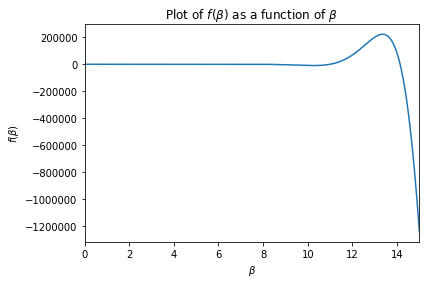

In [42]:
from matplotlib import pyplot as plt
beta = np.linspace (0, 15, 10000) # Beta should be larger than 0 from the formlua shown later.
value = f(beta) 
plt.title(r'Plot of $f(\beta)$ as a function of $\beta$')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$f(\beta)$')
plt.xlim(0, 15)
plt.plot(beta, value)
plt.show()

<font size = 3 color = black face = "Times New Roman">From this figure, it's impossible for us to inspect the zero crossings. Therefore, we need to control the amplitude. Here, we introduce another function $g(\beta) = e^{-\beta}f(\beta) =  e^{-\beta}cosh(\beta)cos(\beta)$. It's easy to see that $g(\beta) = 0$ when and only when $f(\beta) = 0$. As a result, $f(\beta)$ and $g(\beta)$ **have the same zero crossings**, so we can use the plotting of $g(\beta)$ instead.

In [ ]:
import numpy as np
def g(x): 
    return np.exp(-x) * np.cosh(x) * np.cos(x) # Define the function of g(beta).

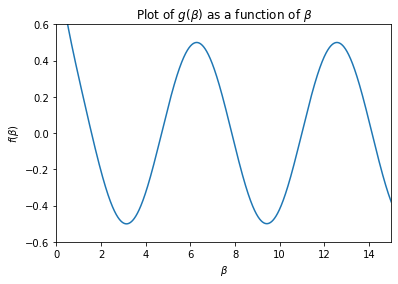

In [44]:
from matplotlib import pyplot as plt
beta = np.linspace (0, 15, 10000) 
# x from(0,15) is enough to represent the plotting and include the first three zero crossings.
value = g(beta)
plt.title(r'Plot of $g(\beta)$ as a function of $\beta$')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$f(\beta)$')
plt.xlim(0, 15) 
plt.ylim(-0.6, 0.6)
plt.plot(beta, value)
plt.show()

<font size = 3 color = black face = "Times New Roman"> b)<br>
From the formula $$\beta^4 = \omega^2\dfrac{\rho A}{EI}$$ it's clear that getting the first three frequency only requires getting the first result of $\beta$. From the graph above, the first three solutions lie in [0,2], [4,6], [6,8] respectively. Here we use the secant method to derive the solution in each interval

In [96]:
# Enter the related parameters.
rho = 7850 # kg/m^3 
E = 2 * 10 ** 11
b = 25 * 10 **(-3) # m
h = 8 * 10 **(-3) # m
A = b * h
I = b * h**3 /12

In [95]:
beta_set = [[0.1, 2], [4, 6], [6, 8]] 
order = ['first', 'second', 'third']
# Enter the initial points for each interval, here we choose 0.1 instead 1 because g(0) goes to infinity.
epsilon = 10 ** (-10) # Set the precision.
for beta in beta_set:
    x1, x2 = beta
    g_x1 = g(x1)
    g_x2 = g(x2)
    while abs(g_x2) > epsilon:
        x = x2 - g_x2 * (x2 - x1) / (g_x2 - g_x1) # The secant method.
        x1 = x2
        x2 = x
        g_x1 =  g_x2
        g_x2 =  g(x2)
    omega = np.sqrt((x ** 4) * E * I / (rho * A)) # Change beta into frequency.
    print('The {} frequency is {}Hz'.format(order[beta_set.index(beta)], omega))

The first frequency is 28.762013612407646Hz
The second frequency is 258.8581225116747Hz
The third frequency is 719.0503403102077Hz


<font size = 3 color = black face = "Times New Roman">The first three frequcency are 28.762Hz, 58.858Hz and 719.050Hz